In [1]:
from __future__ import division
from __future__ import print_function

import data_tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import itertools


%matplotlib inline

In [2]:
root_path = '/home/ruffsl/Desktop/bag_final';
bag_folder_names = [
    'ojflo_data',
    'ojflo_occ',
    'ron_data',
    'ron_occ',
    'tide',
    'tide_occ',
    ]

In [3]:
! cp bag2file.bash {root_path}
! cd {root_path} && ./bag2file.bash

Extracting: ojflo_data.bag
Extracting: ojflo_occ.bag
Extracting: ron_data.bag
Extracting: ron_occ.bag
Extracting: tide.bag
Extracting: tide_occ.bag


In [4]:
for bag in bag_folder_names:
    print(bag,':')
    folder_path = os.path.join(root_path, bag)
    data_tools.synchronize_Object_TF_Pose(folder_path)

ojflo_data :
	base_df2:  (2452, 7)
	object_df2:  (2454, 7)
ojflo_occ :
	base_df2:  (2440, 7)
	object_df2:  (2457, 7)
ron_data :
	base_df2:  (2367, 7)
	object_df2:  (2376, 7)
ron_occ :
	base_df2:  (2689, 7)
	object_df2:  (2700, 7)
tide :
	base_df2:  (2926, 7)
	object_df2:  (2938, 7)
tide_occ :
	base_df2:  (2713, 7)
	object_df2:  (2714, 7)


In [6]:
for bag in bag_folder_names:
    print(bag,':')
    base_poses_path = os.path.join(root_path, bag, 'base_sync.txt')
    object_poses_path = os.path.join(root_path, bag, 'object_sync.txt')
    object_error_path = os.path.join(root_path, bag, 'object_error.txt')
    data_tools.getGlobalErrors(base_poses_path, object_poses_path, object_error_path)

ojflo_data :
ojflo_occ :
ron_data :
ron_occ :
tide :
tide_occ :


In [15]:
def read_error(file_path):
    error_df = pd.read_csv(file_path, header=None)
    return error_df

def plot_error(error_df, error_th):
    error_df.plot(ylim=[0, error_th])
#     error_df.plot()
    
def filter_error(error_df, error_th):
    error_df[(error_df>=error_th)] = pd.NaT
    return error_df

def get_ratio(error_df, error_th):
    drops = error_df>=error_th
    return np.sum(drops)/len(drops)

def get_mean(error_df):
    return error_df.mean(axis=0)

ojflo_data :
	Ratio: 0.040783%
	Mean:  0.813106977683


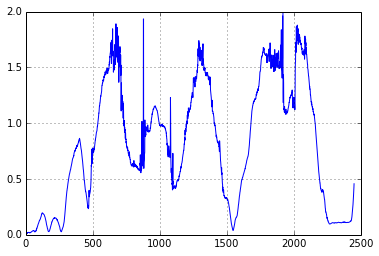

ojflo_occ :
	Ratio: 0.491803%
	Mean:  0.326687510708


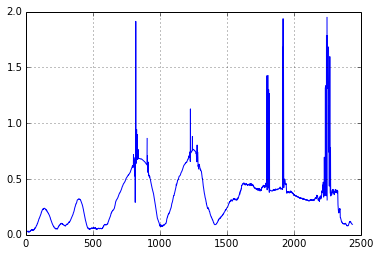

ron_data :
	Ratio: 0.042248%
	Mean:  0.762519681023


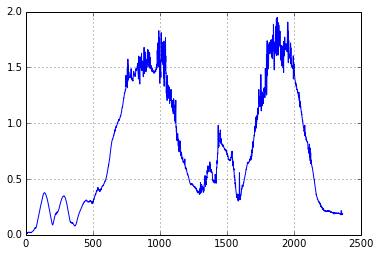

ron_occ :
	Ratio: 0.148754%
	Mean:  0.19948352473


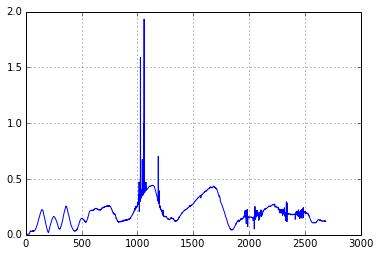

tide :
	Ratio: 0.000000%
	Mean:  0.695821249829


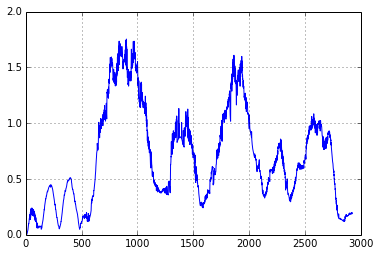

tide_occ :
	Ratio: 0.036860%
	Mean:  0.274424841114


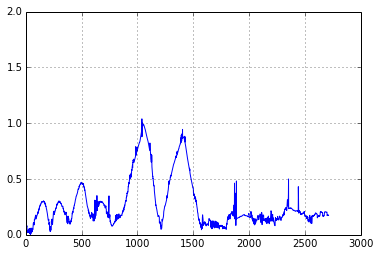

In [21]:
error_th = 2.0

for bag in bag_folder_names:
    print(bag,':')
    file_path = os.path.join(root_path, bag, 'object_error.txt')
    error_df = read_error(file_path)[0]
    print('\tRatio: %f%%' % (100*get_ratio(error_df, error_th)))
    error_df = filter_error(error_df, error_th)
    print('\tMean: ', get_mean(error_df))
    plt.figure()
    plot_error(error_df, error_th)
    plt.show()
#     break